# Modeling
- Te goal is to build a logistic regression model and implement different pieces of this model using scikit learn library.

### Logistic Regression
- Logistic regression is a supervised machine learning algorithm used for binary classification problems (e.g., yes/no, 0/1 outcomes). It models the relationship between the input features and the probability of belonging to a particular class using the logistic (sigmoid) function.

- In scikit-learn, logistic regression is implemented using the LogisticRegression class. It supports various regularization --techniques and optimization solvers, making it flexible for different datasets.

# Required libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load Data

- To review the dataset and explore its descriptive statistics, please click on the **EDA** section.


[EDA Section](http://localhost:8888/notebooks/OneDrive/Desktop/Hospital%20Readmission/Hospital-Readmission-/00%20-%20eda.ipynb)


In [23]:
Data_Set=pd.read_csv("Data/hospital_readmissions.csv")
print(f"\033[1mDataset Shape:\033[0m {Data_Set.shape}")



Dataset Shape: (25000, 17)


In [24]:
# Summary in a DataFrame
data_summary = pd.DataFrame({
    "Column": Data_Set.columns,
    "Data Type": Data_Set.dtypes,
    "Missing Values": Data_Set.isnull().sum()
})
data_summary.reset_index(drop=True, inplace=True)
data_summary


,Column,Data Type,Missing Values
0,age,object,0
1,time_in_hospital,int64,0
2,n_lab_procedures,int64,0
3,n_procedures,int64,0
4,n_medications,int64,0
5,n_outpatient,int64,0
6,n_inpatient,int64,0
7,n_emergency,int64,0
8,medical_specialty,object,0
9,diag_1,object,0


# Descriptive statistics


In [25]:
# Numerical columns summary
print("\033[1mNumerical columns summary:\033[0m")
print(Data_Set.describe())

# Categorical columns summary
print("\033[1mCategorical columns summary:\033[0m")
for col in Data_Set.select_dtypes(include=('object')):
    print(f"\033[1m{col}:\033[0m")
    print(Data_Set[col].value_counts())


Numerical columns summary:
       time_in_hospital  n_lab_procedures  n_procedures  n_medications  \
count       25000.00000       25000.00000  25000.000000   25000.000000   
mean            4.45332          43.24076      1.352360      16.252400   
std             3.00147          19.81862      1.715179       8.060532   
min             1.00000           1.00000      0.000000       1.000000   
25%             2.00000          31.00000      0.000000      11.000000   
50%             4.00000          44.00000      1.000000      15.000000   
75%             6.00000          57.00000      2.000000      20.000000   
max            14.00000         113.00000      6.000000      79.000000   

       n_outpatient   n_inpatient   n_emergency  
count  25000.000000  25000.000000  25000.000000  
mean       0.366400      0.615960      0.186600  
std        1.195478      1.177951      0.885873  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000  
50%   

# Descriptive Statistics


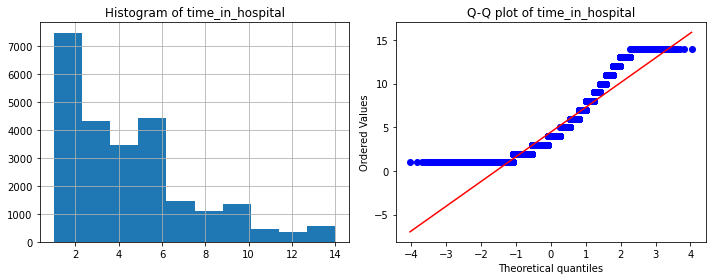

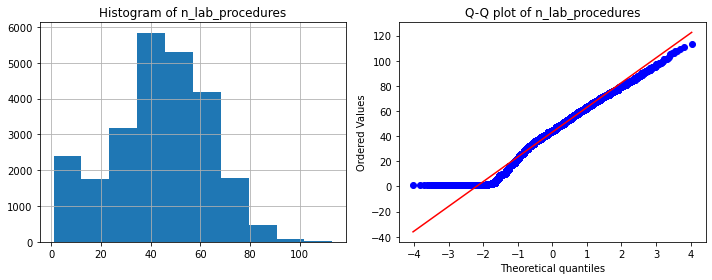

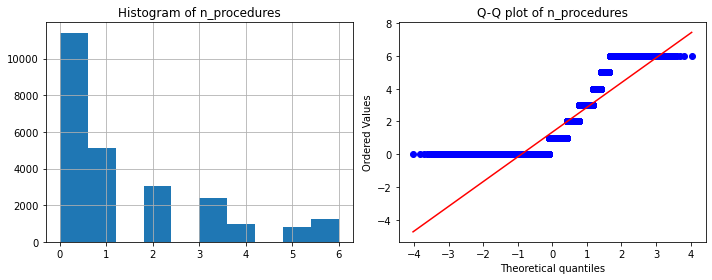

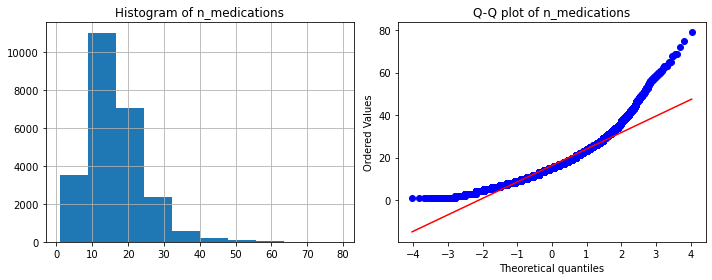

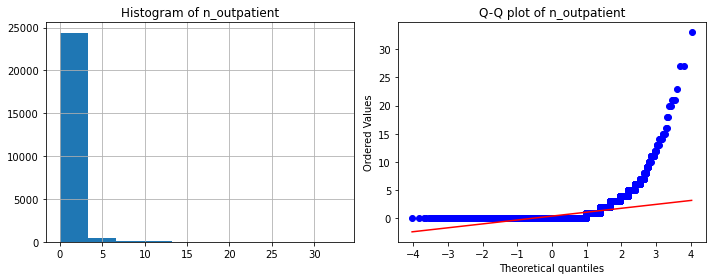

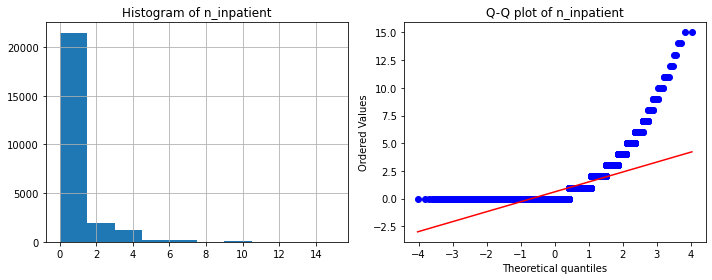

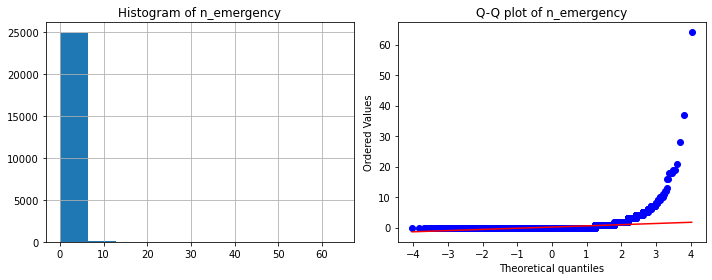

In [5]:
#3- Distribution analysis
numerical_columns=Data_Set.select_dtypes(include=[np.number]).columns
for col in numerical_columns:
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    Data_Set[col].hist()
    plt.title(f'Histogram of {col}')
    plt.subplot(122)
    stats.probplot(Data_Set[col], dist="norm",plot=plt)
    plt.title(f'Q-Q plot of {col}')
    plt.tight_layout()
    plt.show()

# Correlation Analysis


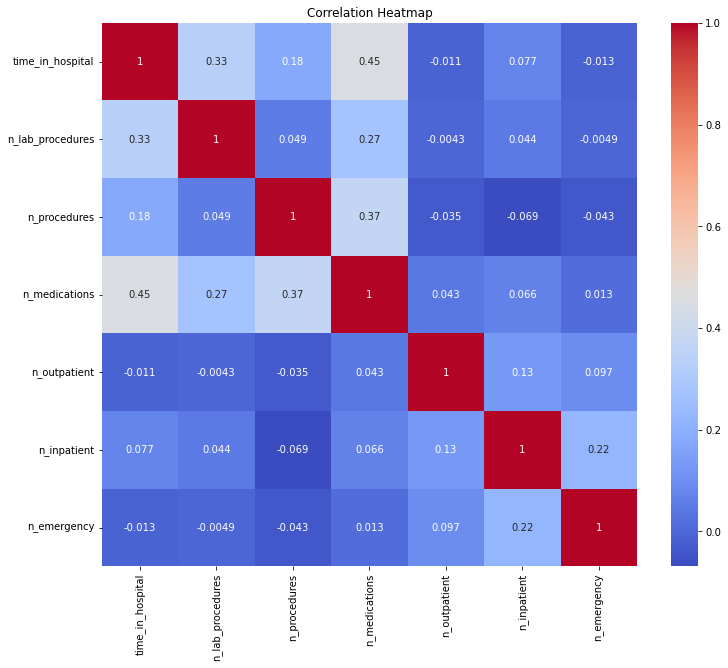

In [6]:
#4- Correlation analysis

corr_matrix=Data_Set[numerical_columns].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
    

# Target Variable Analysis


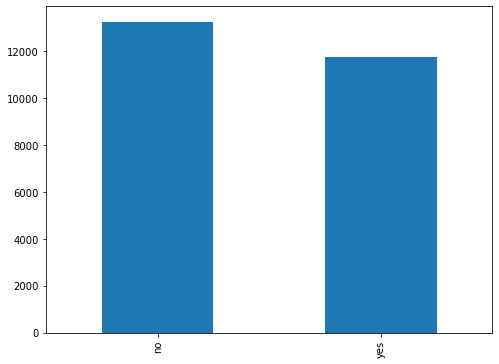

In [7]:
#5- Target variable analysis

if 'readmitted' in Data_Set.columns:
    plt.figure(figsize=(8,6))
    Data_Set['readmitted'].value_counts().plot(kind='bar')
    plt.show()
else:
    print("No readmitted column in dataframe")
    

# Feature Relationship

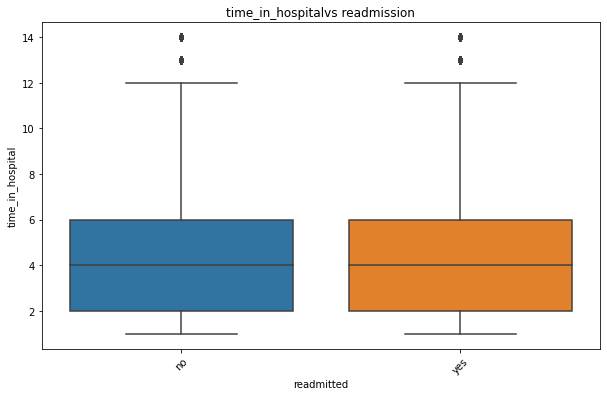

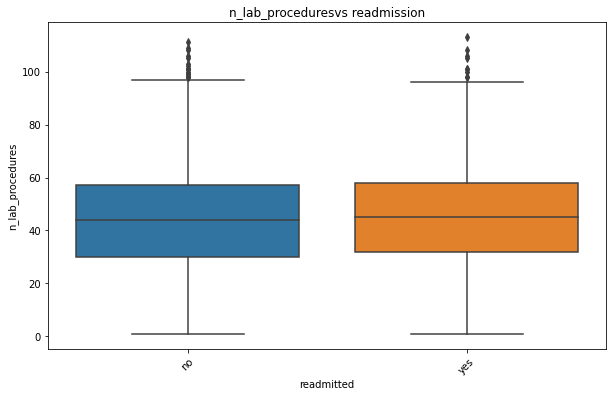

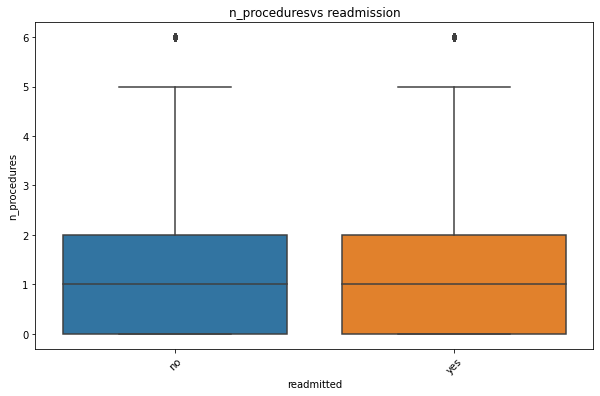

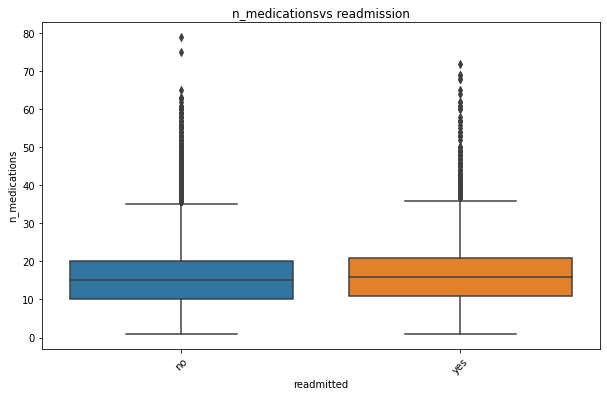

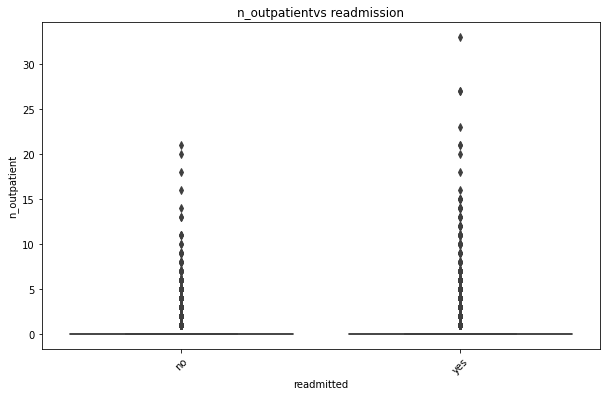

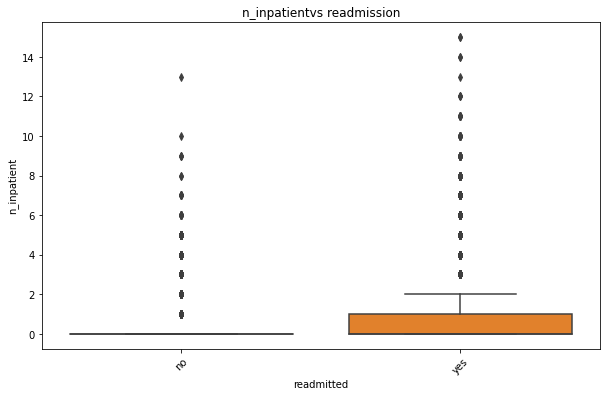

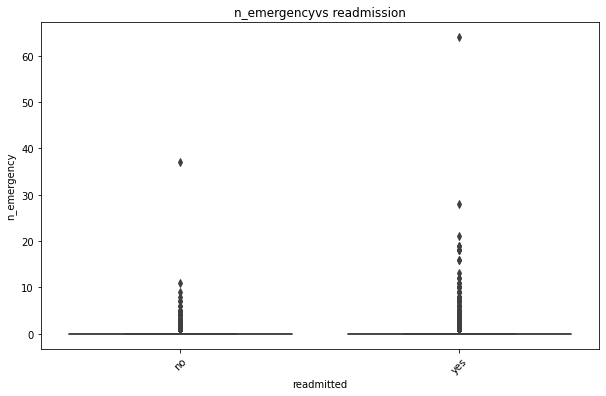

In [8]:


if 'readmitted' in Data_Set.columns:
    for col in numerical_columns:
        if col!='readmitted':
            plt.figure(figsize=(10,6))
            sns.boxplot(x='readmitted',y=col,data=Data_Set)
            plt.title(f'{col}vs readmission')
            plt.xticks(rotation=45)
            plt.show()
        else:
            print("No column found")
            

age


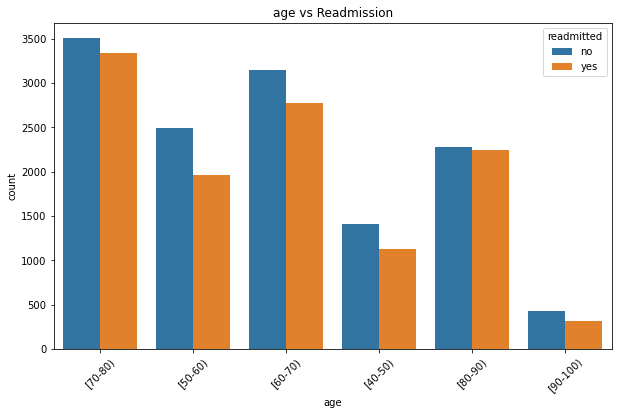

medical_specialty


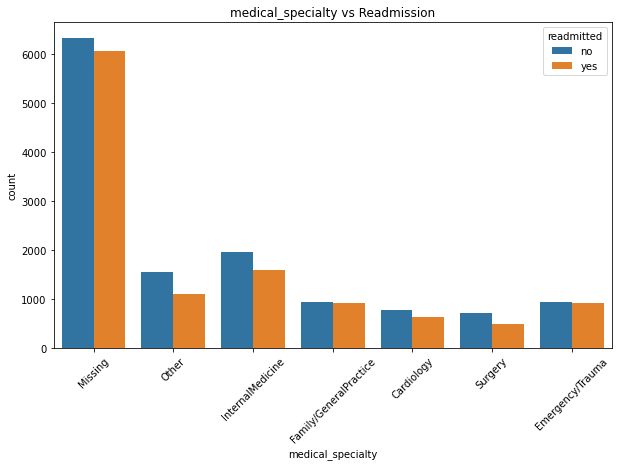

diag_1


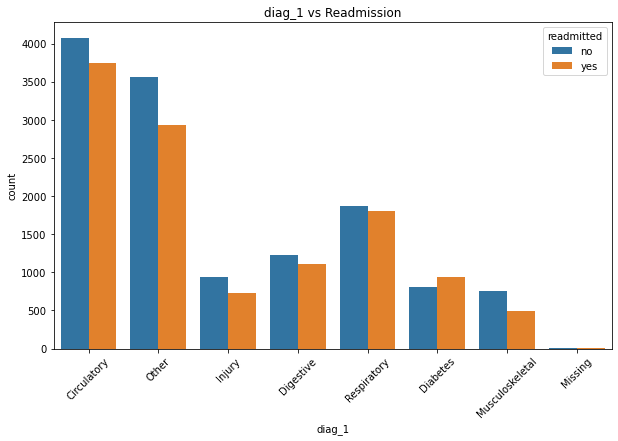

diag_2


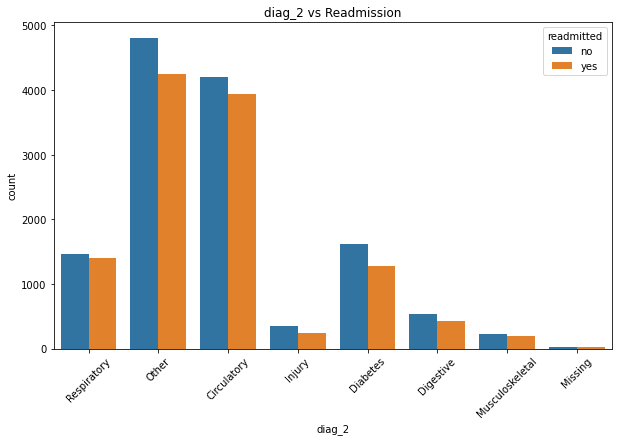

diag_3


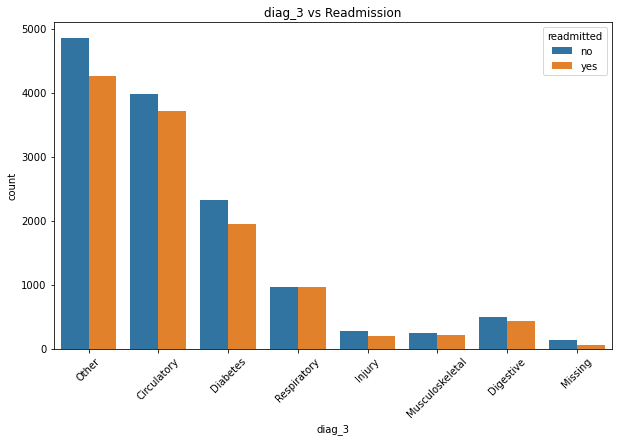

glucose_test


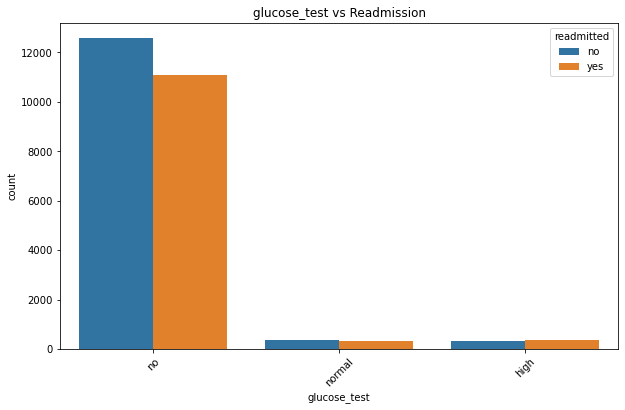

A1Ctest


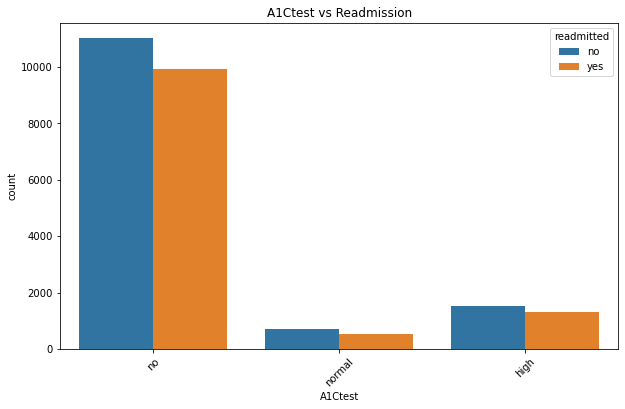

change


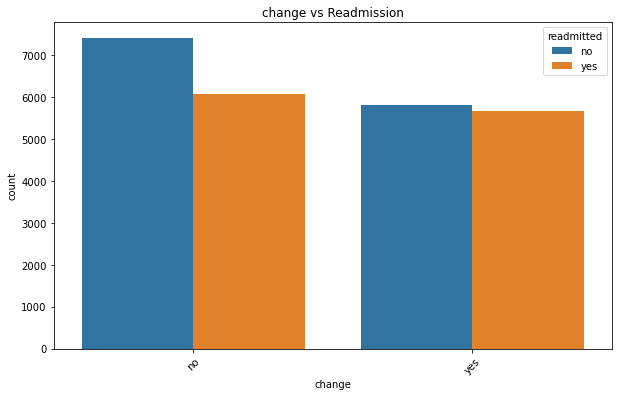

diabetes_med


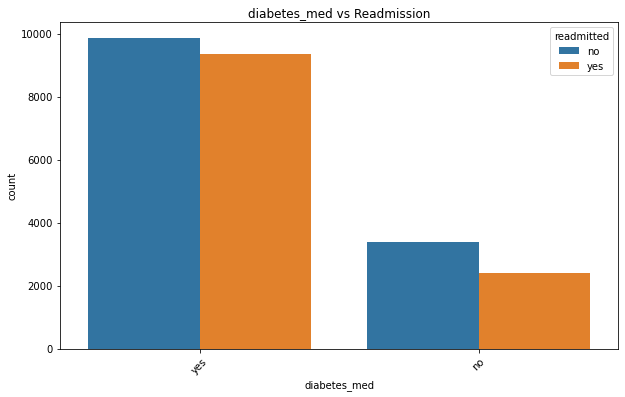

readmitted


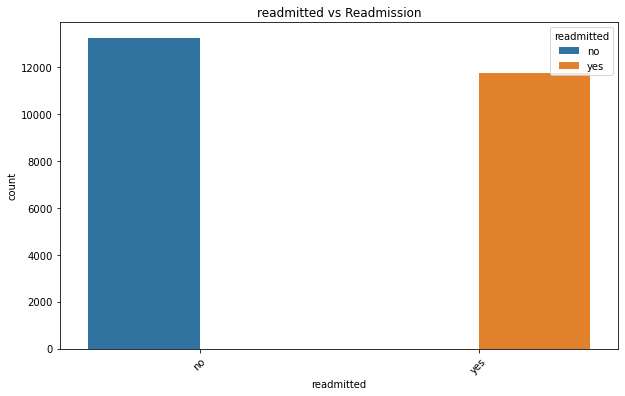

No readmitted column


In [9]:
categorical_column=Data_Set.select_dtypes(include=['object']).columns
for col in categorical_column:
    print(col)
    
    plt.figure(figsize=(10,6)) 
    sns.countplot(x=col, hue='readmitted',data=Data_Set)
    plt.title(f'{col} vs Readmission')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No readmitted column")

# Multivariate Analysis


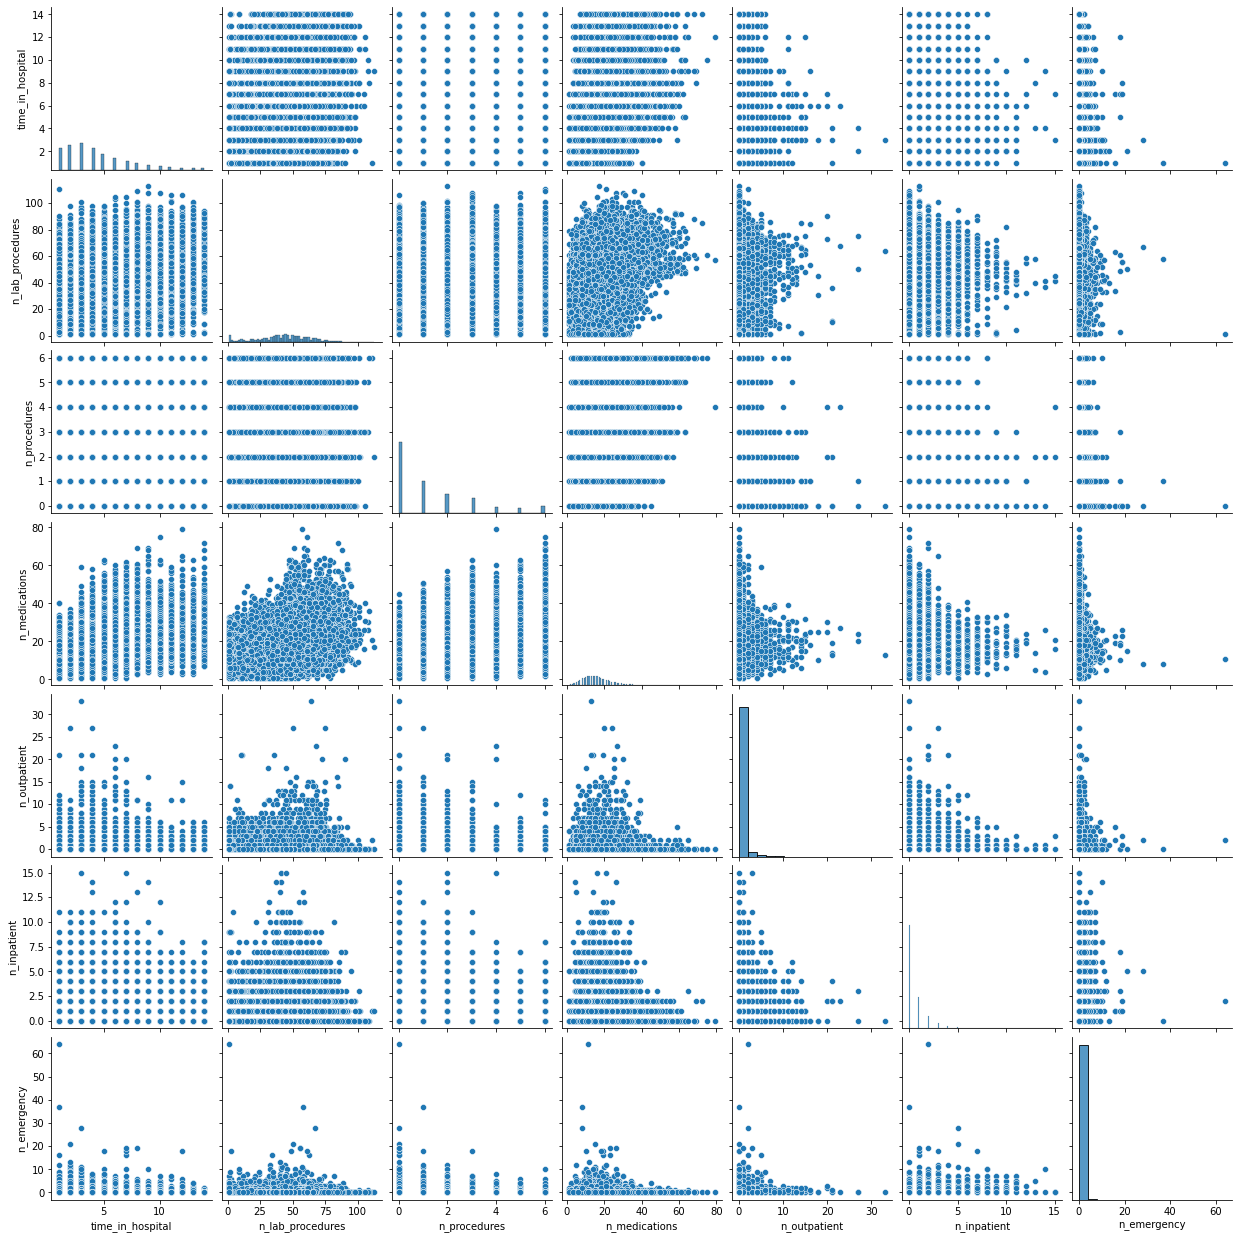

In [10]:
sns.pairplot(Data_Set[numerical_columns])
plt.show()


# Define Numerical and Categorical Columns


In [11]:

numerical_cols = ['time_in_hospital', 'n_lab_procedures', 'n_procedures', 
                  'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency']

categorical_cols = ['age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3',
                    'glucose_test', 'A1Ctest', 'change', 'diabetes_med']





# Preprocessing Step: Scaling Numerical and Encoding Categorical Data


In [12]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),          # Scaling numerical data
        ('cat', OneHotEncoder(drop='first'), categorical_cols) # One-hot encoding categorical data
    ]
)


# Define the pipeline before calling fit()
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('classifier', LogisticRegression(max_iter=1000))  # Logistic regression model
])


# Split the Dataset

In [13]:

X = Data_Set.drop('readmitted', axis=1)
y = Data_Set['readmitted']

# Ensure your target variable is binary (0, 1) for logistic regression
# If 'readmitted' is categorical (e.g., 'yes', 'no'), map it to binary values
y = y.map({'yes': 1, 'no': 0}) if y.dtype == 'object' else y

# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Train the model using the pipeline
pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)


# Evaluate the Model

In [14]:

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.61
Confusion Matrix:
 [[2082  576]
 [1374  968]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.78      0.68      2658
           1       0.63      0.41      0.50      2342

    accuracy                           0.61      5000
   macro avg       0.61      0.60      0.59      5000
weighted avg       0.61      0.61      0.60      5000

